In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
import joblib

## Tratamento dos Dados Entrada:

In [4]:
df_entrada = pd.read_csv('dados_entrada.csv', delimiter=',')
df_entrada['DateTime'] = pd.to_datetime(df_entrada['data_abreviada'], format='%Y-%m-%d')

df_entrada['DateTime'] = pd.to_datetime(df_entrada['DateTime'])
df_entrada['Dia'] = df_entrada['DateTime'].dt.day
df_entrada['DiaDaSemana'] = df_entrada['DateTime'].dt.dayofweek
df_entrada['Mes'] = df_entrada['DateTime'].dt.month
df_entrada['Ano'] = df_entrada['DateTime'].dt.year

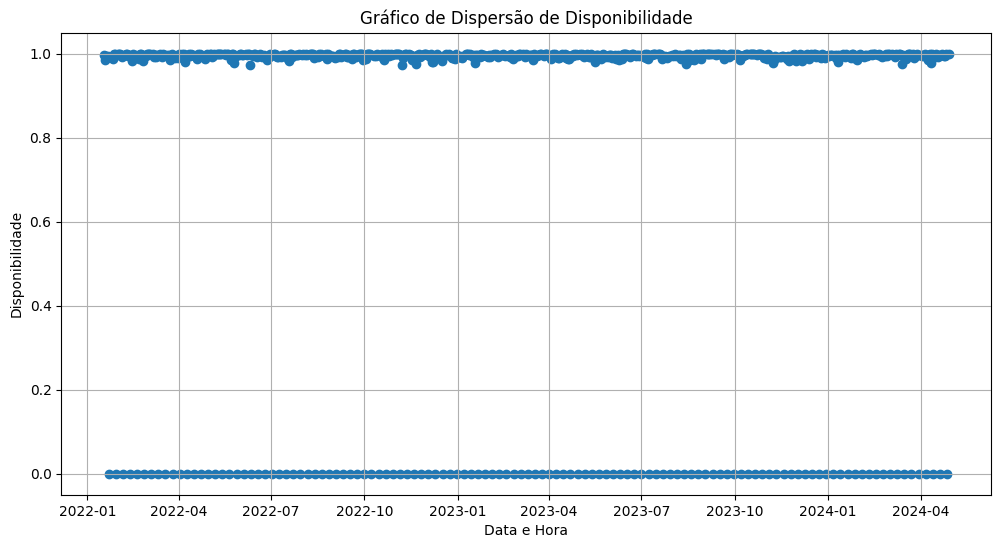

In [7]:
import matplotlib.pyplot as plt

# Ordenar o DataFrame pela coluna 'DateTime' para garantir que os pontos no gráfico estejam em ordem cronológica
dfPlot = df_entrada.sort_values('DateTime')
#dfPlot['DateTime'] = pd.to_datetime(dfPlot['DateTime'])

#intervalo_filtrado = dfPlot[(dfPlot['DateTime'] >= '2025-01-01') & (dfPlot['DateTime'] <= '2025-02-28')]

# Plotar a série temporal de 'estacao_em_operacao' ao longo de 'DateTime'
plt.figure(figsize=(12, 6))
plt.scatter(dfPlot['DateTime'], dfPlot['Disponibilidade'])
plt.xlabel('Data e Hora')
plt.ylabel('Disponibilidade')
plt.title('Gráfico de Dispersão de Disponibilidade')
plt.grid(True)
plt.show()

## Criação Regressão Linear Entrada


Codificar características categóricas (dia da semana e Mês)

In [8]:
weekday_dummies = pd.get_dummies(df_entrada['DiaDaSemana'], prefix='DiaDaSemana')
month_dummies = pd.get_dummies(df_entrada['Mes'], prefix='Mes')
df_entrada = pd.concat([df_entrada, weekday_dummies, month_dummies], axis=1)


Divida os dados em treino e teste

In [9]:
# Supondo que 'df' contém as características temporais tratadas e 'Value' é a saída desejada
X_entrada = df_entrada[['Dia', 'DiaDaSemana_0','DiaDaSemana_1','DiaDaSemana_2','DiaDaSemana_3', 'DiaDaSemana_4', 'DiaDaSemana_5',\
          'Mes_1', 'Mes_2', 'Mes_3', 'Mes_4', 'Mes_5', 'Mes_6', 'Mes_7', 'Mes_8', 'Mes_9', 'Mes_10', 'Mes_11', 'Mes_12', 'Ano']]
y_entrada = df_entrada['Disponibilidade']

In [10]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_entrada, y_entrada, test_size=0.2, random_state=42)

Crie e treine um modelo de regressão linear


In [11]:
modRoboEntrada = LinearRegression()
modRoboEntrada.fit(X_train, y_train)
# Salvar o modelo treinado em um arquivo
joblib.dump(modRoboEntrada, 'modRoboEntrada.pkl')

['modRoboEntrada.pkl']

Faça previsões no conjunto de teste

In [12]:
y_pred = modRoboEntrada.predict(X_test)

Avalie o desempenho do modelo

In [13]:
rmse_entrada = np.sqrt(mean_squared_error(y_test, y_pred))
print("A raiz quadrada da média do quadrado dos erros do modelo de Regressão Linear é:", rmse_entrada)

A raiz quadrada da média do quadrado dos erros do modelo de Regressão Linear é: 0.0046286116799053294


In [14]:
# Criar um DataFrame com o dia 4 de abril de 2027
next_day = pd.DataFrame({
    'Dia': [4],
    'DiaDaSemana_0': [1],  # Segunda-feira
    'DiaDaSemana_1': [0],
    'DiaDaSemana_2': [0],
    'DiaDaSemana_3': [0],
    'DiaDaSemana_4': [0],
    'DiaDaSemana_5': [0],
    'Mes_1': [0], 'Mes_2': [0], 'Mes_3': [0], 'Mes_4': [1], 'Mes_5': [0], 'Mes_6': [0], 'Mes_7': [0], 
    'Mes_8': [0], 'Mes_9': [0], 'Mes_10': [0], 'Mes_11': [0], 'Mes_12': [0],
    'Ano': [2027]
    })

    # Fazer previsões com o modelo para o próximo instante
predicted_value = modRoboEntrada.predict(next_day)

print("A previsão da Disponibilidade para 4/4/2027 é:", predicted_value[0])

A previsão da Disponibilidade para 4/4/2027 é: 0.9944940104433863


## Tratamento dos Dados Transporte

In [25]:
df_transporte = pd.read_csv('dados_transporte.csv', delimiter=',')
df_transporte['DateTime'] = pd.to_datetime(df_transporte['data_abreviada'], format='%Y-%m-%d')

df_transporte['DateTime'] = pd.to_datetime(df_transporte['DateTime'])
df_transporte['Dia'] = df_transporte['DateTime'].dt.day
df_transporte['DiaDaSemana'] = df_transporte['DateTime'].dt.dayofweek
df_transporte['Mes'] = df_transporte['DateTime'].dt.month
df_transporte['Ano'] = df_transporte['DateTime'].dt.year

## Criação Regressão Linear Transporte

In [26]:
weekday_dummies_transporte = pd.get_dummies(df_transporte['DiaDaSemana'], prefix='DiaDaSemana')
month_dummies_transporte = pd.get_dummies(df_transporte['Mes'], prefix='Mes')
df_transporte = pd.concat([df_transporte, weekday_dummies_transporte, month_dummies_transporte], axis=1)

# Supondo que 'df' contém as características temporais tratadas e 'Value' é a saída desejada
X_transporte = df_transporte[['Dia', 'DiaDaSemana_0','DiaDaSemana_1','DiaDaSemana_2','DiaDaSemana_3', 'DiaDaSemana_4', 'DiaDaSemana_5',\
          'Mes_1', 'Mes_2', 'Mes_3', 'Mes_4', 'Mes_5', 'Mes_6', 'Mes_7', 'Mes_8', 'Mes_9', 'Mes_10', 'Mes_11', 'Mes_12', 'Ano']]
y_transporte = df_transporte['Disponibilidade']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_transporte, y_transporte, test_size=0.2, random_state=42)

modEsteira = LinearRegression()
modEsteira.fit(X_train, y_train)
# Salvar o modelo treinado em um arquivo
joblib.dump(modEsteira, 'modEsteira.pkl')

y_pred = modEsteira.predict(X_test)
rmse_transporte = np.sqrt(mean_squared_error(y_test, y_pred))
print("A raiz quadrada da média do quadrado dos erros do modelo de Regressão Linear é:", rmse_transporte)

A raiz quadrada da média do quadrado dos erros do modelo de Regressão Linear é: 0.005509852038584536


## Tratamento dos Dados Inspeção

In [17]:
df_inspecao = pd.read_csv('dados_inspecao.csv', delimiter=',')
df_inspecao['DateTime'] = pd.to_datetime(df_inspecao['data_abreviada'], format='%Y-%m-%d')

df_inspecao['DateTime'] = pd.to_datetime(df_inspecao['DateTime'])
df_inspecao['Dia'] = df_inspecao['DateTime'].dt.day
df_inspecao['DiaDaSemana'] = df_inspecao['DateTime'].dt.dayofweek
df_inspecao['Mes'] = df_inspecao['DateTime'].dt.month
df_inspecao['Ano'] = df_inspecao['DateTime'].dt.year

## Criação Regressão Linear Inspeção

In [18]:
weekday_dummies_inspecao = pd.get_dummies(df_inspecao['DiaDaSemana'], prefix='DiaDaSemana')
month_dummies_inspecao = pd.get_dummies(df_inspecao['Mes'], prefix='Mes')
df_inspecao = pd.concat([df_inspecao, weekday_dummies_inspecao, month_dummies_inspecao], axis=1)

# Supondo que 'df' contém as características temporais tratadas e 'Value' é a saída desejada
X_inspecao = df_inspecao[['Dia', 'DiaDaSemana_0','DiaDaSemana_1','DiaDaSemana_2','DiaDaSemana_3', 'DiaDaSemana_4', 'DiaDaSemana_5',\
          'Mes_1', 'Mes_2', 'Mes_3', 'Mes_4', 'Mes_5', 'Mes_6', 'Mes_7', 'Mes_8', 'Mes_9', 'Mes_10', 'Mes_11', 'Mes_12', 'Ano']]
y_inspecao = df_inspecao['Disponibilidade']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_inspecao, y_inspecao, test_size=0.2, random_state=42)

modRoboInspecao = LinearRegression()
modRoboInspecao.fit(X_train, y_train)
# Salvar o modelo treinado em um arquivo
joblib.dump(modRoboInspecao, 'modRoboInspecao.pkl')

y_pred = modRoboInspecao.predict(X_test)
rmse_inspecao = np.sqrt(mean_squared_error(y_test, y_pred))
print("A raiz quadrada da média do quadrado dos erros do modelo de Regressão Linear é:", rmse_inspecao)

A raiz quadrada da média do quadrado dos erros do modelo de Regressão Linear é: 0.004172356064973309


## Tratamento dos Dados Inspeção

In [19]:
df_limpeza = pd.read_csv('dados_limpeza.csv', delimiter=',')
df_limpeza['DateTime'] = pd.to_datetime(df_limpeza['data_abreviada'], format='%Y-%m-%d')

df_limpeza['DateTime'] = pd.to_datetime(df_limpeza['DateTime'])
df_limpeza['Dia'] = df_limpeza['DateTime'].dt.day
df_limpeza['DiaDaSemana'] = df_limpeza['DateTime'].dt.dayofweek
df_limpeza['Mes'] = df_limpeza['DateTime'].dt.month
df_limpeza['Ano'] = df_limpeza['DateTime'].dt.year

## Criação Regressão Linear Limpeza

In [20]:
weekday_dummies_limpeza = pd.get_dummies(df_limpeza['DiaDaSemana'], prefix='DiaDaSemana')
month_dummies_limpeza = pd.get_dummies(df_limpeza['Mes'], prefix='Mes')
df_limpeza = pd.concat([df_limpeza, weekday_dummies_limpeza, month_dummies_limpeza], axis=1)

# Supondo que 'df' contém as características temporais tratadas e 'Value' é a saída desejada
X_limpeza = df_limpeza[['Dia', 'DiaDaSemana_0','DiaDaSemana_1','DiaDaSemana_2','DiaDaSemana_3', 'DiaDaSemana_4', 'DiaDaSemana_5',\
          'Mes_1', 'Mes_2', 'Mes_3', 'Mes_4', 'Mes_5', 'Mes_6', 'Mes_7', 'Mes_8', 'Mes_9', 'Mes_10', 'Mes_11', 'Mes_12', 'Ano']]
y_limpeza = df_limpeza['Disponibilidade']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_limpeza, y_limpeza, test_size=0.2, random_state=42)

modLimpadorPneumatico = LinearRegression()
modLimpadorPneumatico.fit(X_train, y_train)
# Salvar o modelo treinado em um arquivo
joblib.dump(modLimpadorPneumatico, 'modLimpadorPneumatico.pkl')

y_pred = modLimpadorPneumatico.predict(X_test)
rmse_limpeza = np.sqrt(mean_squared_error(y_test, y_pred))
print("A raiz quadrada da média do quadrado dos erros do modelo de Regressão Linear é:", rmse_limpeza)

A raiz quadrada da média do quadrado dos erros do modelo de Regressão Linear é: 0.005359397259361733


## Tratamento dos Dados Saída

In [21]:
df_saida = pd.read_csv('dados_saida.csv', delimiter=',')
df_saida['DateTime'] = pd.to_datetime(df_saida['data_abreviada'], format='%Y-%m-%d')

df_saida['DateTime'] = pd.to_datetime(df_saida['DateTime'])
df_saida['Dia'] = df_saida['DateTime'].dt.day
df_saida['DiaDaSemana'] = df_saida['DateTime'].dt.dayofweek
df_saida['Mes'] = df_saida['DateTime'].dt.month
df_saida['Ano'] = df_saida['DateTime'].dt.year

## Criação Regressão Linear Saída

In [22]:
weekday_dummies_saida = pd.get_dummies(df_saida['DiaDaSemana'], prefix='DiaDaSemana')
month_dummies_saida = pd.get_dummies(df_saida['Mes'], prefix='Mes')
df_saida = pd.concat([df_saida, weekday_dummies_saida, month_dummies_saida], axis=1)

# Supondo que 'df' contém as características temporais tratadas e 'Value' é a saída desejada
X_saida = df_saida[['Dia', 'DiaDaSemana_0','DiaDaSemana_1','DiaDaSemana_2','DiaDaSemana_3', 'DiaDaSemana_4', 'DiaDaSemana_5',\
          'Mes_1', 'Mes_2', 'Mes_3', 'Mes_4', 'Mes_5', 'Mes_6', 'Mes_7', 'Mes_8', 'Mes_9', 'Mes_10', 'Mes_11', 'Mes_12', 'Ano']]
y_saida = df_saida['Disponibilidade']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_saida, y_saida, test_size=0.2, random_state=42)

modRoboSaida = LinearRegression()
modRoboSaida.fit(X_train, y_train)
# Salvar o modelo treinado em um arquivo
joblib.dump(modRoboSaida, 'modRoboSaida.pkl')

y_pred = modRoboSaida.predict(X_test)
rmse_saida = np.sqrt(mean_squared_error(y_test, y_pred))
print("A raiz quadrada da média do quadrado dos erros do modelo de Regressão Linear é:", rmse_saida)

A raiz quadrada da média do quadrado dos erros do modelo de Regressão Linear é: 0.004864711782093048
